In [ ]:
# For data manipulation and analysis (DataFrames, arrays, etc.)
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

# To ignore warning messages in output (for cleaner output)
import warnings
warnings.filterwarnings('ignore')

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# For feature scaling (important before training many ML models)
from sklearn.preprocessing import StandardScaler

# Logistic Regression (Linear classifier)
from sklearn.linear_model import LogisticRegression

# Decision Tree Classifier (Non-linear model using tree structure)
from sklearn.tree import DecisionTreeClassifier

# Random Forest Classifier (Ensemble method combining multiple decision trees)
from sklearn.ensemble import RandomForestClassifier

Load the Dataset

In [ ]:
# Read the CSV file containing wine quality data into a pandas DataFrame
wine_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wine Quality Analysis/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#EDA (Exploring the data)

In [ ]:
# Check the number of rows (samples) and columns (features) in the dataset
wine_df.shape

(1599, 12)

(1599, 12) — 1599 samples, 12 columns (11 features + 1 target : quality)

In [ ]:
# Get a concise summary of the DataFrame:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Check for any missing (null) values in each column
wine_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


A clean dataset

In [ ]:
# Get summary statistics for all numeric columns
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Count the number of occurrences of each wine quality score
wine_df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


This will plot histograms for every numeric column in the dataset.

'bins=100' means each histogram will be split into 100 bars for higher detail.

'figsize' defines the overall size of the figure (width=10, height=12 inches)

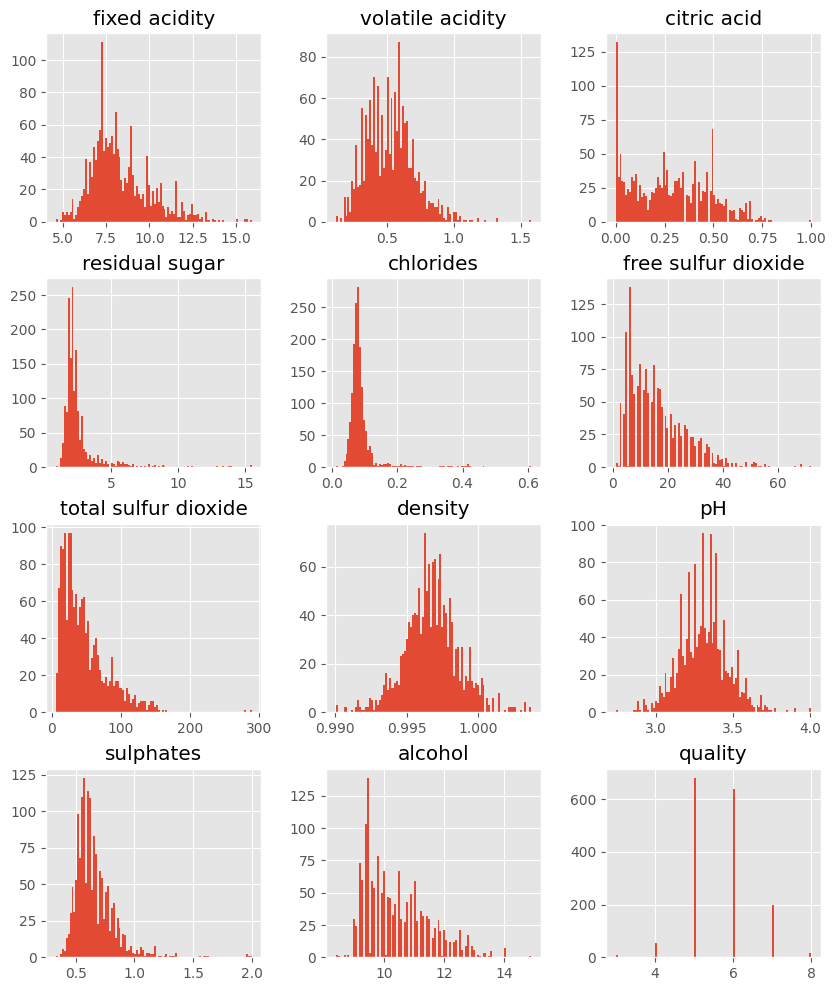

In [ ]:
# Plot Histograms of All Numerical Features
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

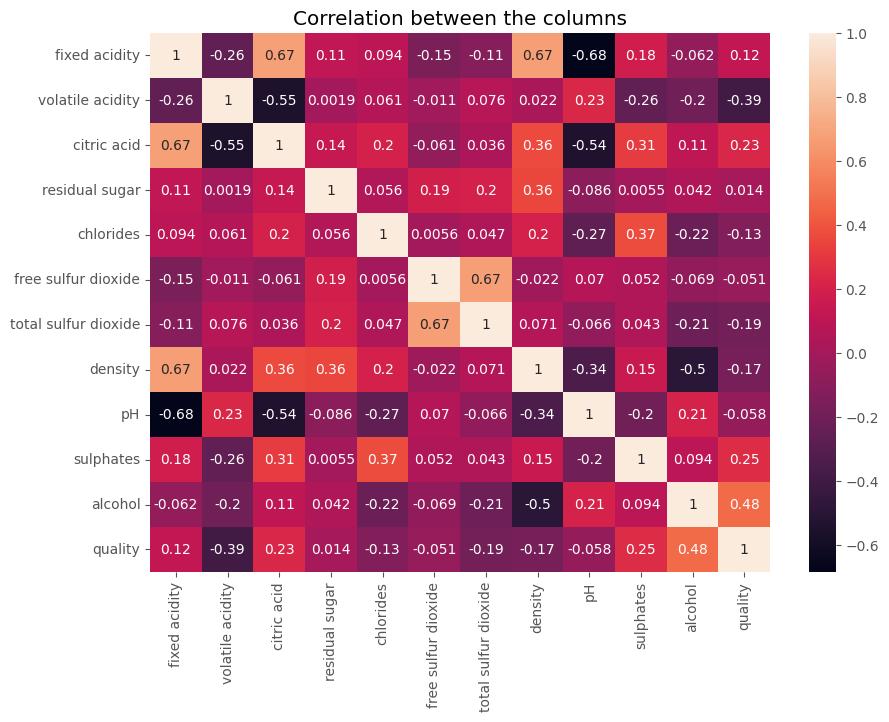

In [ ]:
# Heatmap: Visualizing Feature Correlation
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [ ]:
# Correlation of Each Feature with 'quality'
wine_df.corr()['quality'].sort_values()

,quality
volatile acidity,-0.390558
total sulfur dioxide,-0.185100
density,-0.174919
chlorides,-0.128907
pH,-0.057731
free sulfur dioxide,-0.050656
residual sugar,0.013732
fixed acidity,0.124052
citric acid,0.226373
sulphates,0.251397


* Alcohol has the strongest positive correlation with quality → higher alcohol likely means better wine.
* Volatile acidity has a strong negative correlation → too much of it lowers quality.
* Features like citric acid or residual sugar have low correlation → might not help the model much.

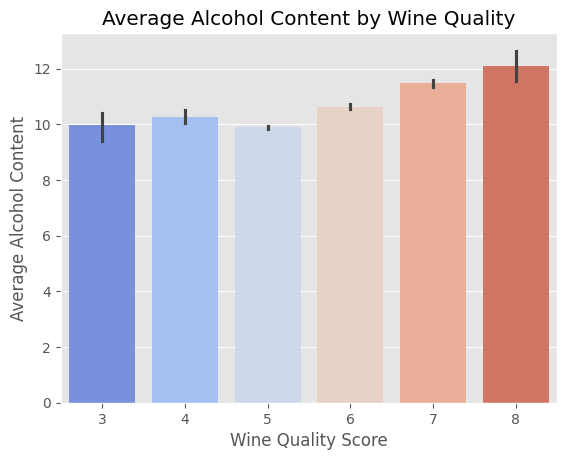

In [ ]:
# Bar Plot: Average Alcohol Content by Wine Quality
# Unique quality scores sorted
quality_order = sorted(wine_df['quality'].unique())

# Define a color palette with a different color for each quality score
custom_colors = sns.color_palette("coolwarm", len(quality_order))

# Barplot with custom palette
sns.barplot(x='quality', y='alcohol', data=wine_df, palette=custom_colors, order=quality_order)

plt.title('Average Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality Score')
plt.ylabel('Average Alcohol Content')
plt.show()

This plot shows how alcohol content changes with different wine quality scores. It calculates the average alcohol content for each quality level and displays it as a bar.

#Data Processing

In [ ]:
# Convert Multi-Class Quality into Binary Classification
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

We are reducing the target variable from a multi-class problem (3–8) to a binary classification problem.
Makes it easier to train classifiers like Logistic Regression or Decision Trees to simply decide:
"Is this wine good?"

In [ ]:
wine_df['quality'].value_counts()

,count
quality,
0,1382
1,217


If wine quality is 7 or higher, classify it as 'good' (1), Otherwise, classify as 'not good' (0)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Drop the target and categorical label from the dataset to keep only numeric features
X = wine_df.drop(['quality'], axis=1)
y = wine_df['quality']

# Split data before SMOTE (important to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to Balance the Training Data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 1105, 1: 174})
After SMOTE: Counter({0: 1105, 1: 1105})


1. Splitting the dataset into training/testing subsets (80/20)
2. Balancing only the training set by oversampling the minority class

The original red wine dataset exhibited a significant class imbalance, with far fewer high-quality wines compared to low-quality ones. This imbalance can bias machine learning models toward predicting the majority class, reducing their ability to correctly identify the minority class (high-quality wines).

To address this, we applied SMOTE (Synthetic Minority Oversampling Technique), which generates synthetic examples of the minority class by interpolating between existing ones. This helped in balancing the dataset and enabled the models to learn from both classes more effectively. After balancing, model performance—especially in terms of recall and F1-score for the minority class—improved significantly.

In [ ]:
#  Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

MODEL1: LOGISTIC REGRESSION

Accuracy: 0.825

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       277
           1       0.42      0.79      0.55        43

    accuracy                           0.82       320
   macro avg       0.69      0.81      0.72       320
weighted avg       0.89      0.82      0.85       320



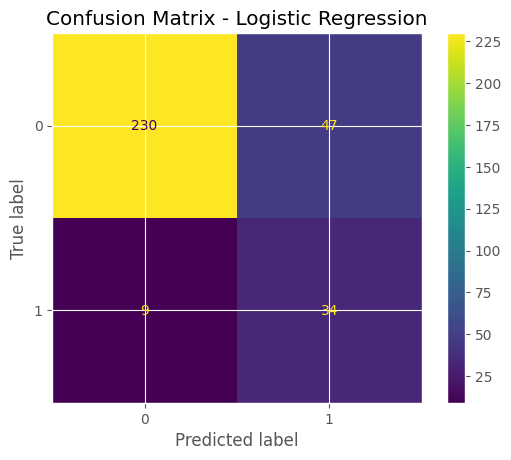

In [ ]:
# Train logistic regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train_smote)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

MODEL2: DECISION TREE

Accuracy: 0.86875

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       277
           1       0.51      0.72      0.60        43

    accuracy                           0.87       320
   macro avg       0.73      0.81      0.76       320
weighted avg       0.89      0.87      0.88       320



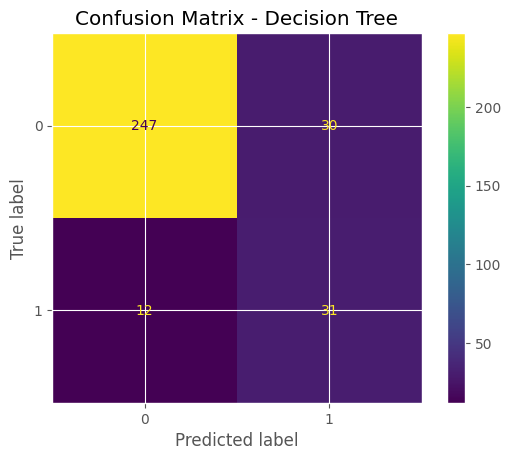

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

MODEL3: RANDOM FOREST

Accuracy: 0.921875

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       277
           1       0.70      0.74      0.72        43

    accuracy                           0.92       320
   macro avg       0.83      0.85      0.84       320
weighted avg       0.92      0.92      0.92       320



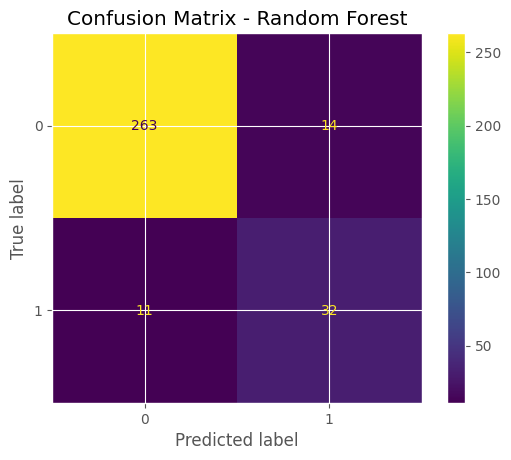

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()

#Ensemble Learning
Ensemble Learning means combining multiple machine learning models to make better predictions than any single model alone.

The Voting Classifier chooses the majority opinion or average prediction, which is more likely to be correct.

Models like Decision Trees overfit the training data.
But combining them with others smooths out their sharp decisions.

Ensemble Voting Classifier Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       277
           1       0.61      0.72      0.66        43

    accuracy                           0.90       320
   macro avg       0.78      0.82      0.80       320
weighted avg       0.91      0.90      0.90       320



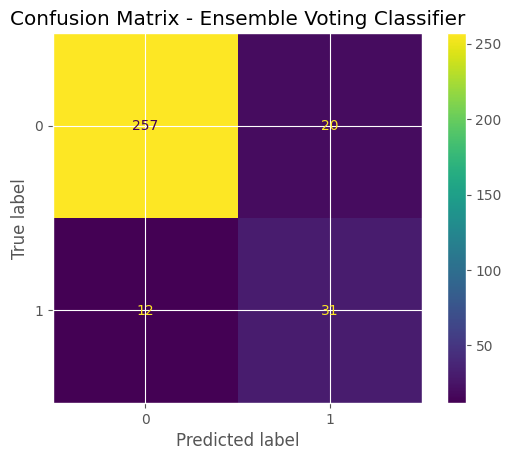

In [ ]:
from sklearn.ensemble import VotingClassifier

# Scale training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define individual models
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Create ensemble with soft voting (based on predicted probabilities)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('rf', rf_clf)],
    voting='soft'  # or 'hard' for majority class voting
)

# Train ensemble
voting_clf.fit(X_train_scaled, y_train_smote)

# Predict and evaluate
y_pred_ensemble = voting_clf.predict(X_test_scaled)

print("Ensemble Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble)
plt.title("Confusion Matrix - Ensemble Voting Classifier")
plt.show()

#XGBoost Algorithm

XGBoost is a scalable and accurate gradient boosting algorithm that builds an ensemble of decision trees. It is known for its speed and performance, especially on structured data. In this project, XGBoost helps improve classification accuracy and handle imbalanced data effectively, making it an ideal candidate for wine quality prediction.

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# Define the Individual Models
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting Classifier with 4 models; Combine Models with Soft Voting
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', dt_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'
)

# Train ensemble
voting_clf.fit(X_train_scaled, y_train_smote)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eva...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

                 Model  Accuracy
0  Logistic Regression  0.825000
1        Decision Tree  0.868750
2        Random Forest  0.918750
3              XGBoost  0.915625
4    Ensemble (Voting)  0.906250


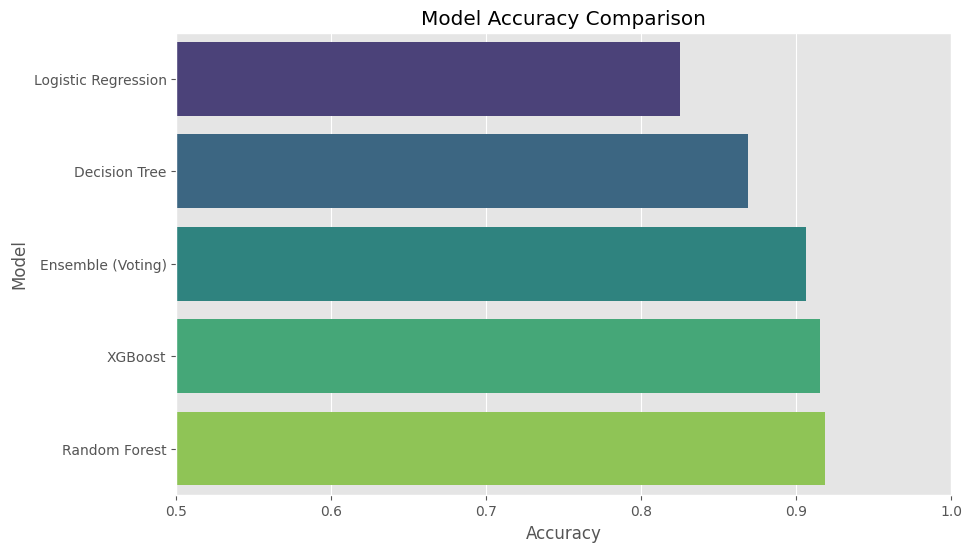

In [ ]:
# Define a dictionary to store all models and give each a label
models = {
    "Logistic Regression": log_clf,
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf,
    "Ensemble (Voting)": voting_clf
}

# Dictionary to store accuracy scores of each model
scores = {}

# Loop through each model, train it, predict on test set, and record accuracy
for name, model in models.items():
    model.fit(X_train_scaled, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc

# Display table
results_df = pd.DataFrame(list(scores.items()), columns=['Model', 'Accuracy'])
print(results_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values('Accuracy'), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlim(0.5, 1)
plt.show()

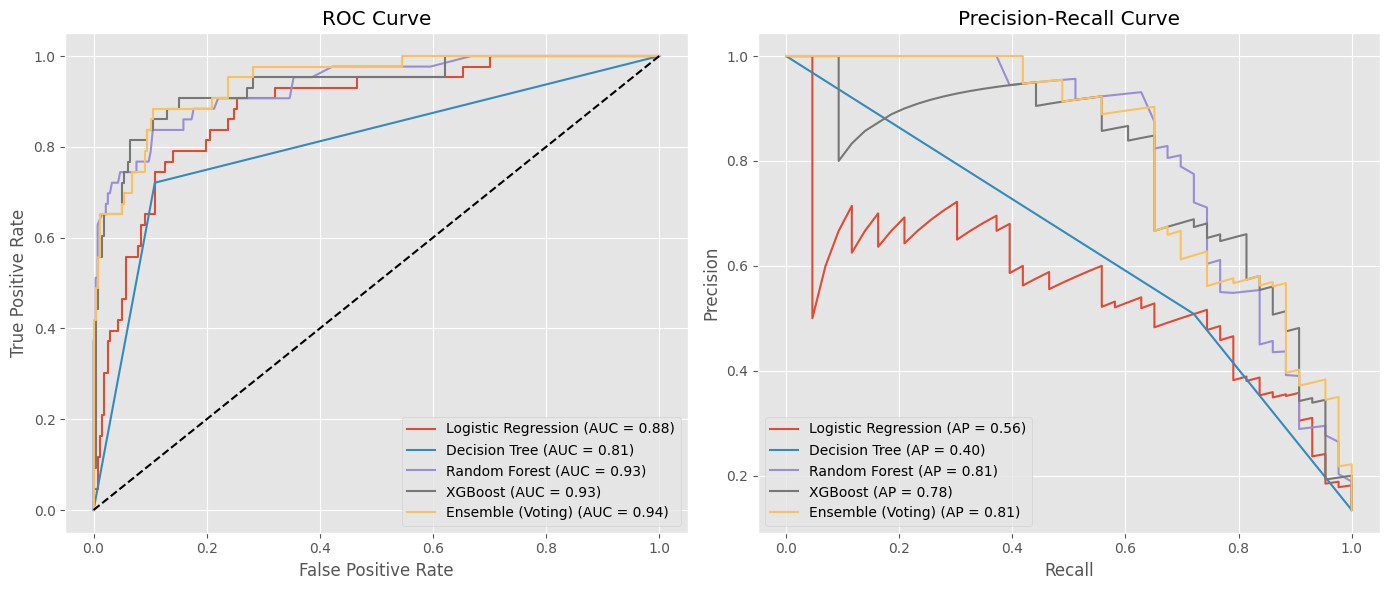

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr(models, X_test, y_test):
    plt.figure(figsize=(14, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = average_precision_score(y_test, y_proba)
        plt.plot(recall, precision, label=f'{name} (AP = {pr_auc:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Models dictionary (from earlier)
plot_roc_pr(models, X_test_scaled, y_test)